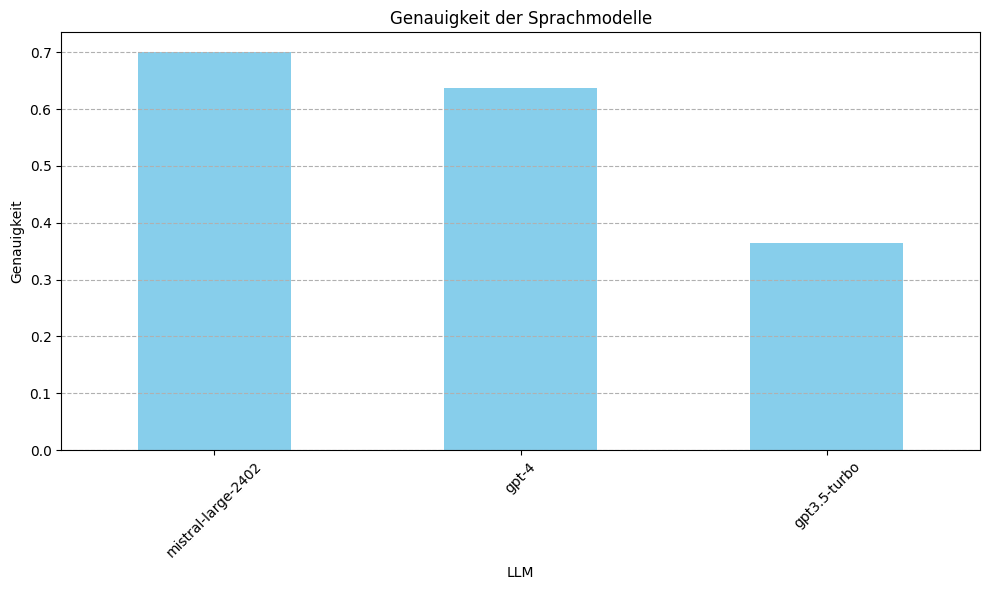

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Laden der Excel-Datei
file_path = 'bench_data/TreppensetiegenBenchmark.xlsx'
df = pd.read_excel(file_path)

# Zuordnen des LLM zu allen Zeilen, bis ein neues LLM erscheint
df['LLM'] = df['LLM'].ffill()

# Berechnung, ob die Antwort korrekt war
df['Correct'] = df['ScoreLLM'] == df['ScoreReal']

# Berechnung der Anzahl der korrekten Antworten und der Gesamtanzahl der Antworten pro LLM
correct_counts_all = df.groupby('LLM')['Correct'].sum()
total_counts_all = df.groupby('LLM').size()

# Erstellen eines DataFrame mit den berechneten Werten
accuracy_df_all = pd.DataFrame({'Correct': correct_counts_all, 'Total': total_counts_all})
accuracy_df_all['Accuracy'] = accuracy_df_all['Correct'] / accuracy_df_all['Total']

# Sortierung der Modelle nach Genauigkeit
accuracy_df_all_sorted = accuracy_df_all.sort_values(by='Accuracy', ascending=False)

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
accuracy_df_all_sorted['Accuracy'].plot(kind='bar', color='skyblue')
plt.title('Genauigkeit der Sprachmodelle')
plt.xlabel('LLM')
plt.ylabel('Genauigkeit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()
